In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
df =pd.read_csv(r"D:\Excel R\Data Science Assignments\KNN(K-nearst Neighbours)\glass.csv")

In [223]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [224]:
df.shape

(214, 10)

# Data PreProcessing

In [225]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [226]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [227]:
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [228]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


when ever we are dealing with the distances we Normaliz the value


In [230]:
def norm_data(i):
    x  =(i -i.min()/(i.max()-i.min()))
    return x

In [231]:
df_norm =norm_data(df.iloc[::-1])
df_norm

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
213,-64.819589,12.616466,0.00,1.989657,60.893929,0.00,8.115353,1.67,0.0,6.833333
212,-64.820189,12.766466,0.00,1.849657,61.143929,0.00,7.975353,1.57,0.0,6.833333
211,-64.816049,12.746466,0.00,1.929657,60.953929,0.00,7.935353,1.64,0.0,6.833333
210,-64.819849,13.306466,0.00,1.899657,60.593929,0.00,7.895353,1.59,0.0,6.833333
209,-64.820469,12.526466,0.00,2.789657,60.143929,0.08,8.675353,1.06,0.0,6.833333
...,...,...,...,...,...,...,...,...,...,...
4,-64.819279,11.656466,3.62,1.149657,60.613929,0.55,7.565353,0.00,0.0,0.833333
3,-64.819039,11.596466,3.69,1.199657,60.143929,0.57,7.715353,0.00,0.0,0.833333
2,-64.820519,11.916466,3.55,1.449657,60.523929,0.39,7.275353,0.00,0.0,0.833333
1,-64.819089,12.276466,3.60,1.269657,60.263929,0.48,7.325353,0.00,0.0,0.833333


They  are No Missing values 

# Plots

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type'>

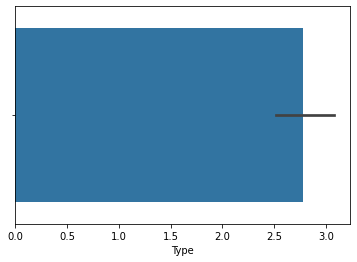

In [232]:
sns.barplot(df['Type'])

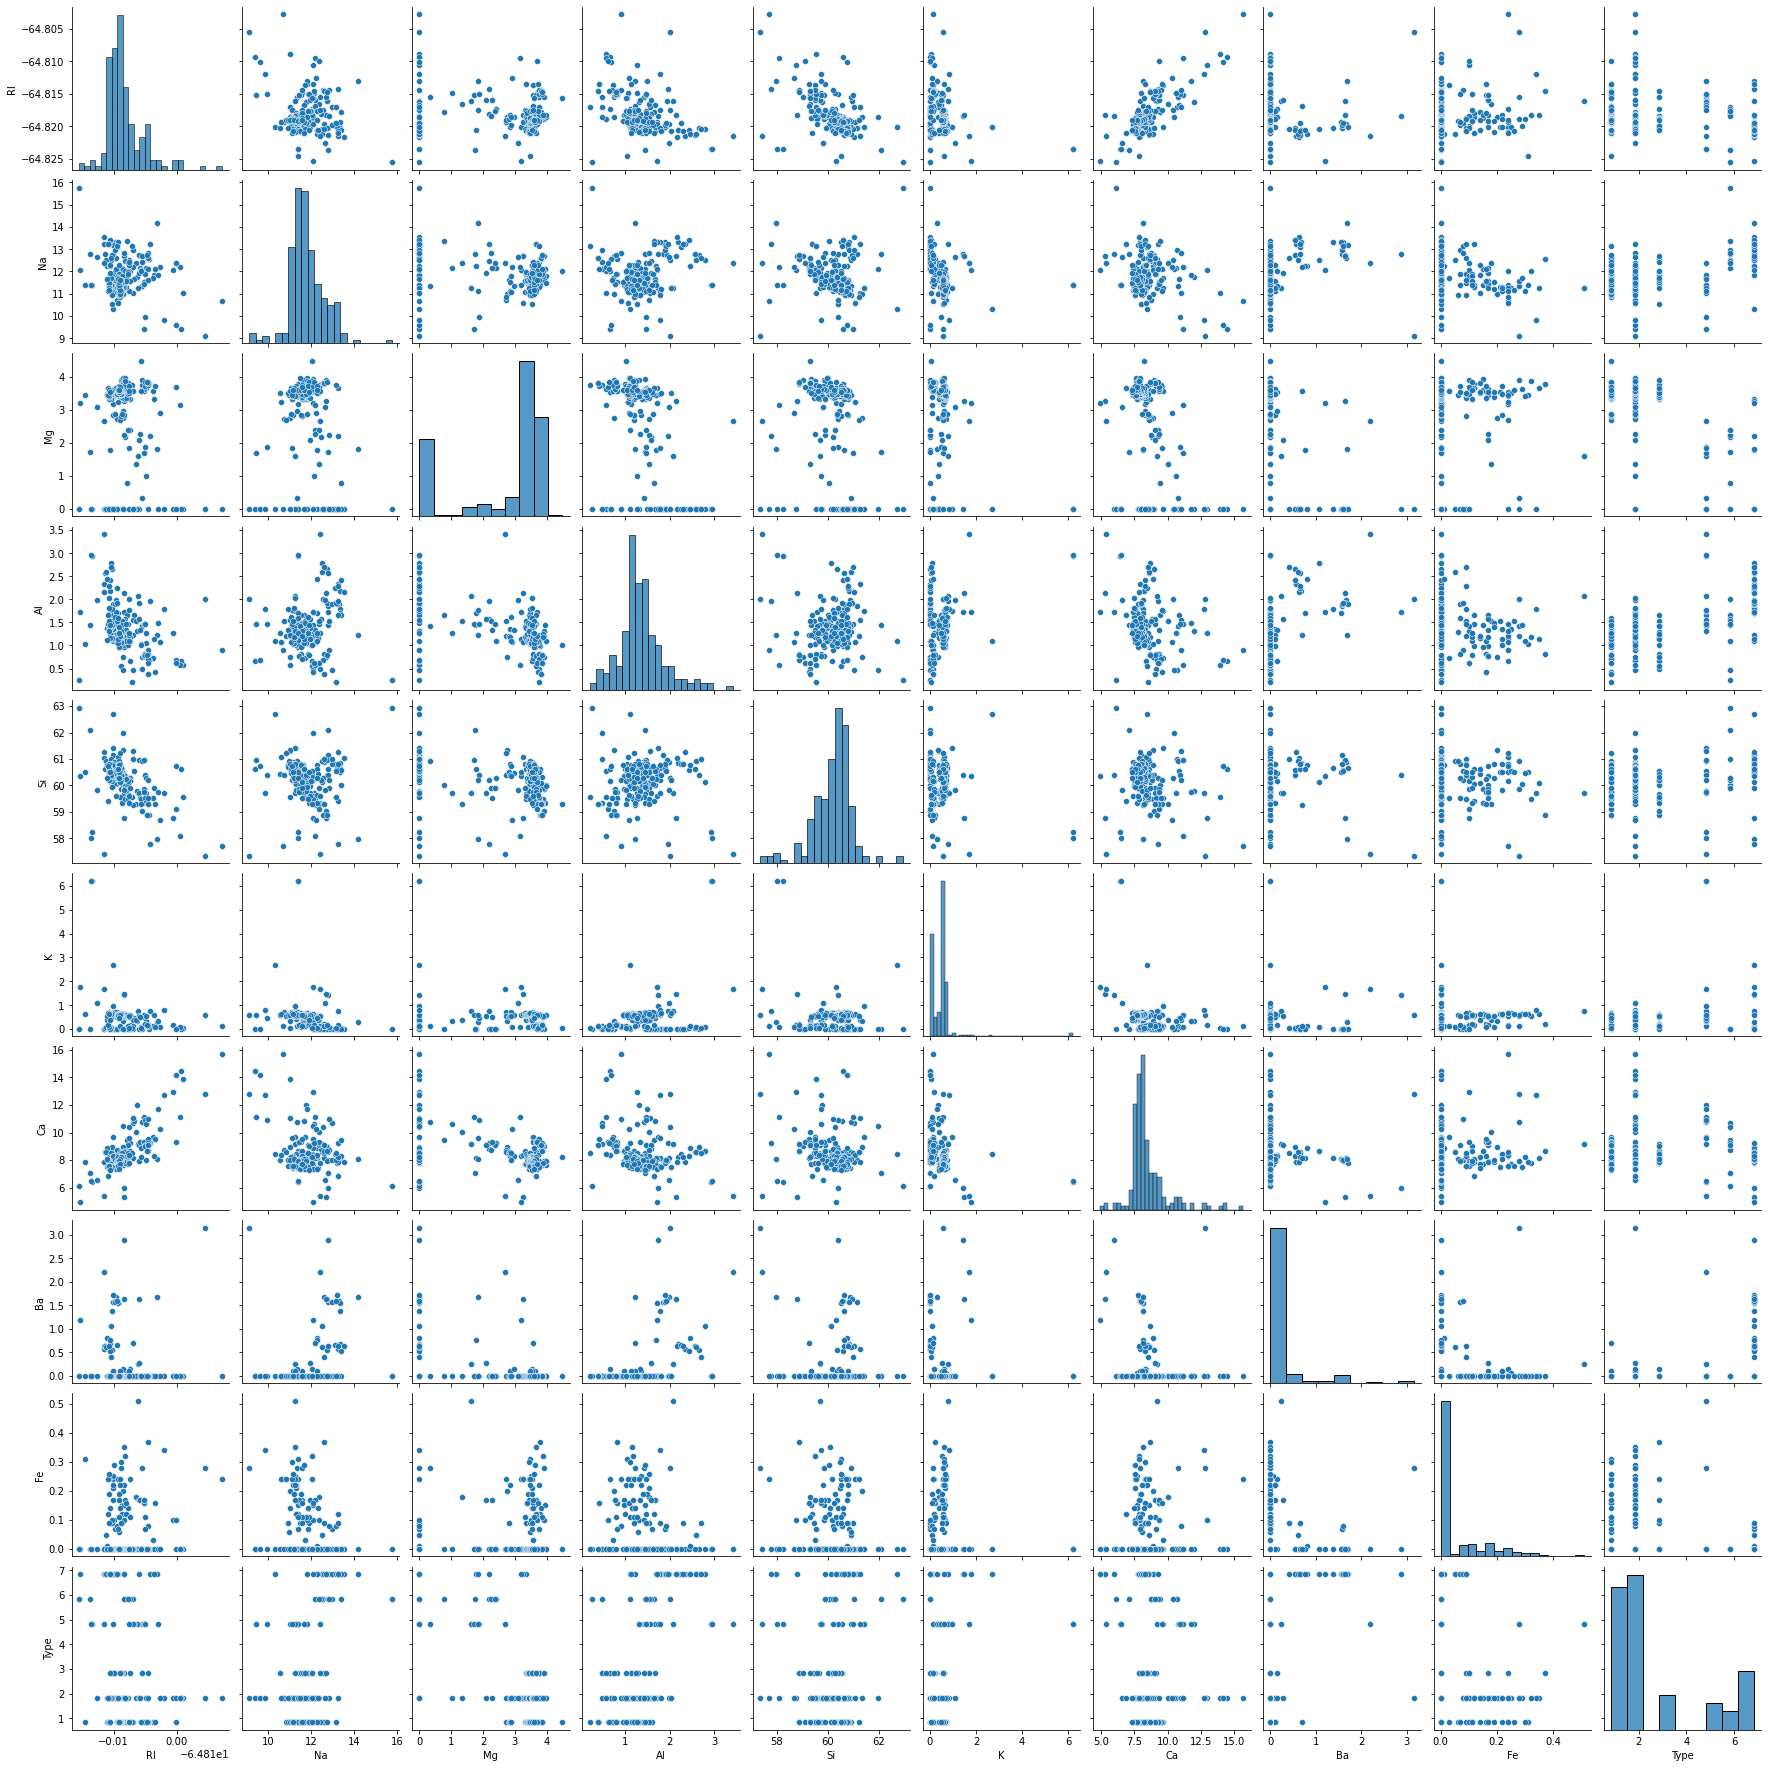

In [233]:
sns.pairplot(data =df_norm)

<AxesSubplot:xlabel='Type', ylabel='Count'>

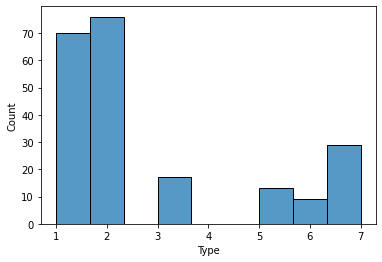

In [234]:
sns.histplot(df['Type'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type', ylabel='Density'>

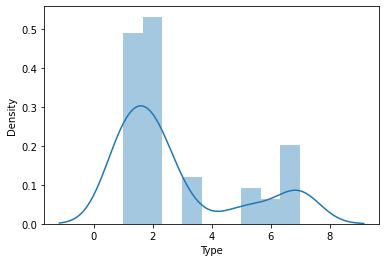

In [235]:
sns.distplot(df['Type'])

In [236]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.metrics import f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [237]:
X=df_norm.iloc[:,0:8]
y=df['Type']

In [238]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.3,random_state =10)

In [239]:
knn =KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [240]:
accuracy =accuracy_score(y_test,y_pred)
accuracy

0.5538461538461539

In [241]:
confusion_matrix(y_pred,y_test)

array([[16,  3,  1,  2,  0,  3],
       [ 4, 12,  2,  0,  0,  3],
       [ 1,  0,  3,  0,  1,  0],
       [ 3,  0,  1,  2,  0,  0],
       [ 1,  0,  0,  0,  1,  0],
       [ 0,  2,  0,  0,  2,  2]], dtype=int64)

In [242]:
count_missclassified =((y_test != y_pred).sum())
count_missclassified

29

# check For k value

In [256]:
accuracy_rate =[];
for i in  range(1,40):
    rkn =KNeighborsClassifier(n_neighbors=i)
    score =cross_val_score(rkn,df_norm,df['Type'],cv =10)
    accuracy_rate.append(score.mean())
    
    

C:\Users\RaviKiran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\RaviKiran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\RaviKiran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\RaviKiran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\RaviKiran\anaco

C:\Users\RaviKiran\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [257]:
accuracy_rate[0:5]

[0.7753246753246753,
 0.7378787878787879,
 0.7943722943722944,
 0.7798701298701298,
 0.7898268398268399]

Text(0, 0.5, 'accuracy_rate')

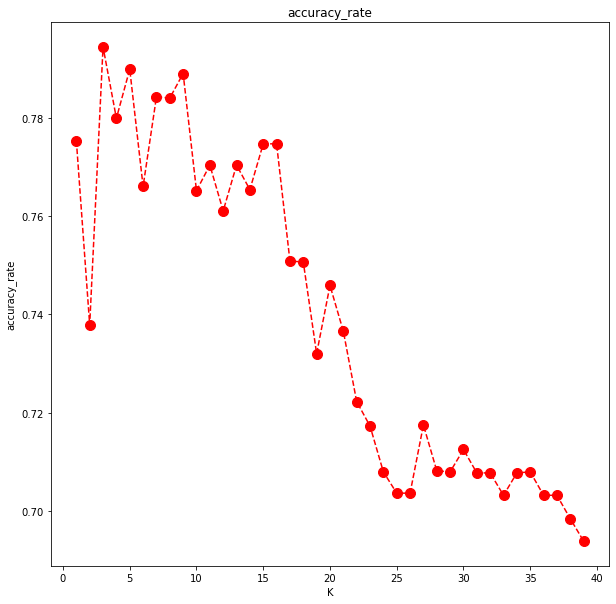

In [258]:
plt.figure(figsize =(10,10));
plt.plot(range(1,40),accuracy_rate,color ="red",linestyle="dashed",marker= 'o',markersize =10)
plt.title("accuracy_rate")
plt.xlabel('K')
plt.ylabel('accuracy_rate')


When k value increase error rate will decrese

In [265]:
final_model =KNeighborsClassifier(n_neighbors=2);
final_model.fit(X_train,y_train)
final_models = final_model.predict(X_test)
final_models

array([3, 2, 1, 3, 5, 2, 1, 1, 1, 3, 2, 1, 1, 1, 6, 2, 5, 1, 1, 2, 5, 2,
       6, 2, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 7, 1, 1, 1, 2, 1,
       1, 1, 7, 1, 2, 3, 2, 2, 6, 1, 2, 5, 1, 2, 2, 1, 7, 2, 3, 2, 7],
      dtype=int64)

In [267]:
accuracy =accuracy_score(y_test,final_models)
accuracy

0.5384615384615384

In [266]:
print(classification_report(y_test,final_models))

              precision    recall  f1-score   support

           1       0.63      0.68      0.65        25
           2       0.57      0.71      0.63        17
           3       0.67      0.57      0.62         7
           5       0.00      0.00      0.00         4
           6       0.33      0.25      0.29         4
           7       0.25      0.12      0.17         8

    accuracy                           0.54        65
   macro avg       0.41      0.39      0.39        65
weighted avg       0.51      0.54      0.52        65

